# Speech Classification Experiments

This notebook provides a suggested structre for your report on your classification experiments.  Fill out the sections below and add the code blocks needed to run your experiments.


## Background

Describe the problem we are trying to solve - classifying speech sounds as male/female, english/chinese.  

## Data

Describe the data we have collected and how it was recorded. How many speakers (male and female), did you need to exclude any, etc.

The words we used in English and Chinese were:

1. 79
2. 14
3. 97
4. 63
5. 54
6. 15
7. 22
8. 31
9. 88
10. 96


## Method

Describe the experimental methods. What steps did you take? How much training and test data did you use.

Briefly describe the classification methods that you used.

# Experiment

This section includes the code for your experiment.

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import numpy as np
import utils  # our own utilities

from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# another utility function to get the data according to metadata properties
male_data = utils.get_data_for(iteminfo, 'gender', 'm')
two_speakers = utils.get_data_for(iteminfo, 'speaker', speakers[:2])

In [4]:
# and another to get the labels for a list of filenames
labels = utils.get_data_labels(iteminfo, male_data, 'language')
#labels[:10]

## Sections

Your code should include blocks that explain what you are doing or interpret the results that you generate.

In [6]:
# use utils library to get metadata for all recordings
data_dirname = 'data'
iteminfo, speakers = utils.extract_metadata('data')
#iteminfo
#speakers
all_data = list(iteminfo.keys())
target =utils.get_data_labels(iteminfo, all_data, 'gender')

In [7]:
def features(datafile):
    y, sr = librosa.load(datafile)
    mfcc = librosa.feature.mfcc(y, sr = sr)
    return mfcc.mean(axis=1)

In [9]:
# more code goes here
features(all_data[0]).shape
data = np.array([features(d) for d in all_data])
#data.shape

#split into train and test 
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
X_train.shape

(294, 20)

# K Nearest Neighbours

In [13]:
# ============================== KNN with k = 1 ===============================================
# instantiate learning model (k = 1)
n_neighbors = 1
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
predicted = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = n_neighbors is %d%%' % acc)


The accuracy of the knn classifier for k = n_neighbors is 95%


# parameter tuning


The optimal number of neighbors is 1.


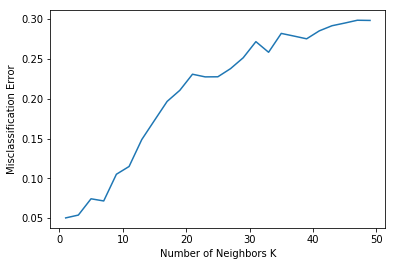

In [14]:
# ============================== parameter tuning =============================================
# creating odd list of K for KNN
from sklearn.cross_validation import cross_val_score
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [15]:
# and print the classification report for precision and recall
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          f       0.97      0.94      0.95        64
          m       0.95      0.98      0.96        82

avg / total       0.96      0.96      0.96       146



In [16]:
# can also look at a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

[[60  4]
 [ 2 80]]


# Naive Bayes Classifiers

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted = gnb.predict(X_test)
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          f       0.63      0.59      0.61        64
          m       0.70      0.73      0.71        82

avg / total       0.67      0.67      0.67       146



## Results

This section shows the results of your experiments. It will include code blocks to generate result tables and maybe plots if appropriate.

In [ ]:
# code to make a result table here

## Discussion

Your final section should discuss your results, did your experiment work? If not, what might some of the reasons be? How could you make it better? 